In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import celerite
import matplotlib.gridspec as gridspec
import seaborn as sns
import astropy.units as u
from scipy.stats import binned_statistic, norm
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
%matplotlib notebook

In [2]:
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 10

# fig.text(0.015, 0.5, 'Rectified Flux', va='center', rotation='vertical')

In [3]:
print(list(np.linspace(-4,4,20)))

[-4.0, -3.5789473684210527, -3.1578947368421053, -2.736842105263158, -2.3157894736842106, -1.8947368421052633, -1.473684210526316, -1.0526315789473686, -0.6315789473684212, -0.2105263157894739, 0.21052631578947345, 0.6315789473684212, 1.0526315789473681, 1.473684210526315, 1.8947368421052628, 2.3157894736842106, 2.7368421052631575, 3.1578947368421044, 3.578947368421052, 4.0]


In [50]:
# fpath = '4000_run/'
# fpath = '11315_run/'
fpath = '42000_run/'
t_u = np.loadtxt(fpath + 'times_u.txt')
t_g = np.loadtxt(fpath + 'times_g.txt')
t_r = np.loadtxt(fpath + 'times_r.txt')
t_i = np.loadtxt(fpath + 'times_i.txt')
t_z = np.loadtxt(fpath + 'times_z.txt')

y_u = np.loadtxt(fpath + 'y_u.txt')
y_g = np.loadtxt(fpath + 'y_g.txt')
y_r = np.loadtxt(fpath + 'y_r.txt')
y_i = np.loadtxt(fpath + 'y_i.txt')
y_z = np.loadtxt(fpath + 'y_z.txt')

ym_u = np.loadtxt(fpath + 'ym_u.txt')
ym_g = np.loadtxt(fpath + 'ym_g.txt')
ym_r = np.loadtxt(fpath + 'ym_r.txt')
ym_i = np.loadtxt(fpath + 'ym_i.txt')
ym_z = np.loadtxt(fpath + 'ym_z.txt')

yerr_u = np.loadtxt(fpath + 'yerr_u.txt')
yerr_g = np.loadtxt(fpath + 'yerr_g.txt')
yerr_r = np.loadtxt(fpath + 'yerr_r.txt')
yerr_i = np.loadtxt(fpath + 'yerr_i.txt')
yerr_z = np.loadtxt(fpath + 'yerr_z.txt')

mu_u = np.loadtxt(fpath + 'mu_u.txt')
mu_g = np.loadtxt(fpath + 'mu_g.txt')
mu_r = np.loadtxt(fpath + 'mu_r.txt')
mu_i = np.loadtxt(fpath + 'mu_i.txt')
mu_z = np.loadtxt(fpath + 'mu_z.txt')

std_u = np.loadtxt(fpath + 'std_u.txt')
std_g = np.loadtxt(fpath + 'std_g.txt')
std_r = np.loadtxt(fpath + 'std_r.txt')
std_i = np.loadtxt(fpath + 'std_i.txt')
std_z = np.loadtxt(fpath + 'std_z.txt')

In [51]:
def time2phase(t0,P,t):
    phase = (((t - t0)%P)/P)
    return phase

def time2phase2(t0,P,t):
    phase = ((t%P)/P)-((t0%P)/P)
    return phase

def doublePhase(t0,P,t,y,yerr,ym,mu,std):
    phase = time2phase2(t0,P,t)
    newphase = np.hstack((phase,phase+1))
    new_y = np.hstack((y,y))
    new_ym = np.hstack((ym,ym))
    new_yerr = np.hstack((yerr,yerr))
    new_mu = np.hstack((mu,mu))
    new_std = np.hstack((std,std))
    return newphase, new_y, new_yerr, new_ym, new_mu, new_std

def binCentres(binedges):
    bincentres = (binedges[1:] + binedges[:-1])/2
    return bincentres

In [52]:
p_u, ny_u,nyerr_u,nym_u,nmu_u,nstd_u = doublePhase(57460.65101007,0.09986526699,t_u,y_u,yerr_u,ym_u,mu_u, std_u)
p_g, ny_g,nyerr_g,nym_g,nmu_g,nstd_g = doublePhase(57460.65101007,0.09986526699,t_g,y_g,yerr_g,ym_g,mu_g, std_g)
p_r, ny_r,nyerr_r,nym_r,nmu_r,nstd_r = doublePhase(57460.65101007,0.09986526699,t_r,y_r,yerr_r,ym_r,mu_r, std_r)
p_i, ny_i,nyerr_i,nym_i,nmu_i,nstd_i = doublePhase(57460.65101007,0.09986526699,t_i,y_i,yerr_i,ym_i,mu_i, std_i)
p_z, ny_z,nyerr_z,nym_z,nmu_z,nstd_z = doublePhase(57460.65101007,0.09986526699,t_z,y_z,yerr_z,ym_z,mu_z, std_z)

<IPython.core.display.Javascript object>


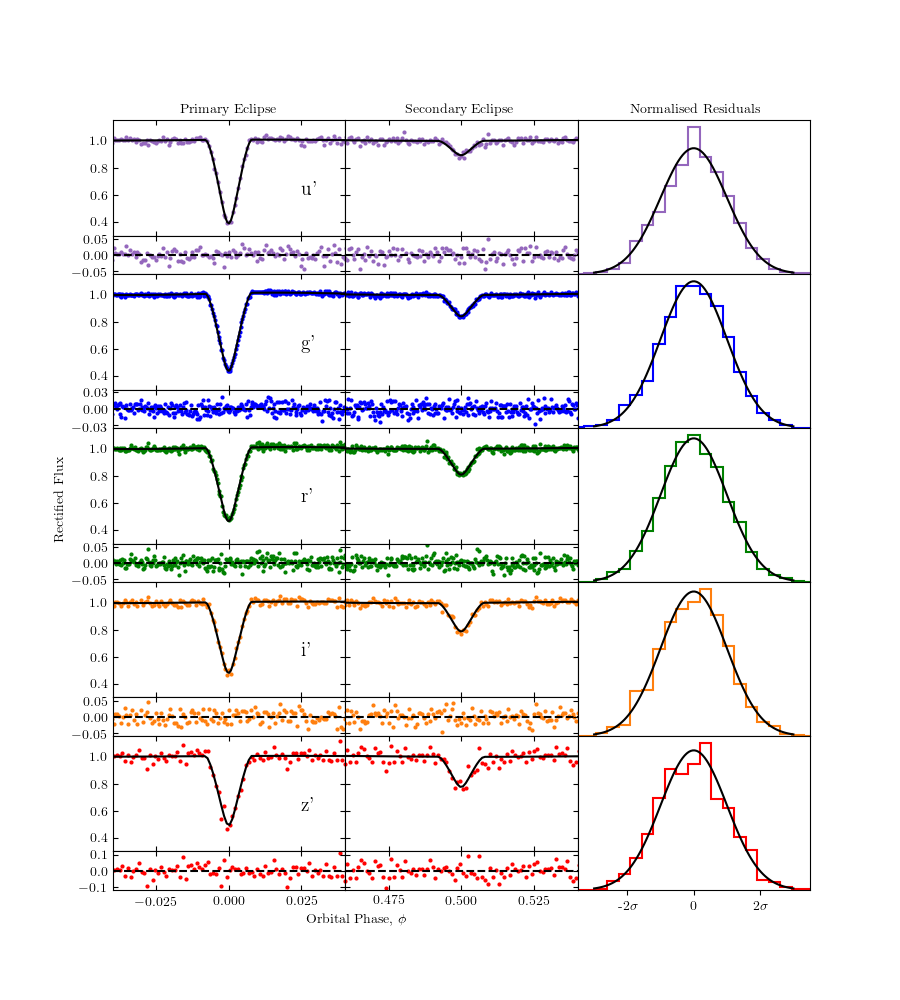

In [53]:
fig = plt.figure(figsize=(9,10))
gs1 = gridspec.GridSpec(20,3)
ax1 = plt.subplot(gs1[:3, 0])
ax2 = plt.subplot(gs1[:3, 1])
ax3 = plt.subplot(gs1[3:4, 0])
ax4 = plt.subplot(gs1[3:4, 1])
ax5 = plt.subplot(gs1[4:7, 0])
ax6 = plt.subplot(gs1[4:7, 1])
ax7 = plt.subplot(gs1[7:8, 0])
ax8 = plt.subplot(gs1[7:8, 1])
ax9 = plt.subplot(gs1[8:11, 0])
ax10 = plt.subplot(gs1[8:11, 1])
ax11 = plt.subplot(gs1[11:12, 0])
ax12 = plt.subplot(gs1[11:12, 1])
ax13 = plt.subplot(gs1[12:15, 0])
ax14 = plt.subplot(gs1[12:15, 1])
ax15 = plt.subplot(gs1[15:16, 0])
ax16 = plt.subplot(gs1[15:16, 1])
ax17 = plt.subplot(gs1[16:19, 0])
ax18 = plt.subplot(gs1[16:19, 1])
ax19 = plt.subplot(gs1[19:20, 0])
ax20 = plt.subplot(gs1[19:20, 1])
ax21 = plt.subplot(gs1[:4, 2])
ax22 = plt.subplot(gs1[4:8, 2])
ax23 = plt.subplot(gs1[8:12, 2])
ax24 = plt.subplot(gs1[12:16, 2])
ax25 = plt.subplot(gs1[16:20, 2])

ax1.scatter(p_u,ny_u,marker='.', color='tab:purple', lw=0, zorder=1)

ax1.plot(p_u,nmu_u+nym_u, color='k',zorder=2)

ax2.scatter(p_u,ny_u,marker='.', color='tab:purple', lw=0, zorder=1)
ax2.plot(p_u,nmu_u+nym_u, color='k',zorder=2)

ax3.errorbar(p_u,ny_u-nym_u-nmu_u, yerr=0, marker='.', color='tab:purple', markersize=4, elinewidth=1.5, lw=0, zorder=1)
ax3.hlines(0,-0.04,0.04,'k','--', lw=1.5)

ax4.errorbar(p_u,ny_u-nym_u-nmu_u, yerr=0, marker='.', color='tab:purple', markersize=4, elinewidth=1.5, lw=0, zorder=1)
ax4.hlines(0,0.46,0.54,'k','--', lw=1.5)

ax5.scatter(p_g,ny_g,marker='.', color='b', lw=0, zorder=1)
ax5.plot(p_g,nmu_g+nym_g, color='k',zorder=2)

ax6.scatter(p_g,ny_g,marker='.', color='b', lw=0, zorder=1)
ax6.plot(p_g,nmu_g+nym_g, color='k',zorder=2)

ax7.errorbar(p_g,ny_g-nym_g-nmu_g, yerr=0, marker='.', color='b', markersize=4, elinewidth=1.5, lw=0, zorder=1)
ax7.hlines(0,-0.04,0.04,'k','--', lw=1.5)

ax8.errorbar(p_g,ny_g-nym_g-nmu_g, yerr=0, marker='.', color='b', markersize=4, elinewidth=1.5, lw=0, zorder=1)
ax8.hlines(0,0.46,0.54,'k','--', lw=1.5)

ax9.scatter(p_r,ny_r,marker='.', color='g', lw=0, zorder=1)
ax9.plot(p_r,nmu_r+nym_r, color='k',zorder=2)

ax10.scatter(p_r,ny_r,marker='.', color='g', lw=0, zorder=1)
ax10.plot(p_r,nmu_r+nym_r, color='k',zorder=2)

ax11.errorbar(p_r,ny_r-nym_r-nmu_r, yerr=0, marker='.', color='g', markersize=4, elinewidth=1.5, lw=0, zorder=1)
ax11.hlines(0,-0.04,0.04,'k','--', lw=1.5)

ax12.errorbar(p_r,ny_r-nym_r-nmu_r, yerr=0, marker='.', color='g', markersize=4, elinewidth=1.5, lw=0, zorder=1)
ax12.hlines(0,0.46,0.54,'k','--', lw=1.5)

ax13.scatter(p_i,ny_i,marker='.', color='tab:orange', lw=0, zorder=1)
ax13.plot(p_i,nmu_i+nym_i, color='k',zorder=2)

ax14.scatter(p_i,ny_i,marker='.', color='tab:orange', lw=0, zorder=1)
ax14.plot(p_i,nmu_i+nym_i, color='k',zorder=2)

ax15.errorbar(p_i,ny_i-nym_i-nmu_i, yerr=0, marker='.', color='tab:orange', markersize=4, elinewidth=1.5, lw=0, zorder=1)
ax15.hlines(0,-0.04,0.04,'k','--', lw=1.5)

ax16.errorbar(p_i,ny_i-nym_i-nmu_i, yerr=0, marker='.', color='tab:orange', markersize=4, elinewidth=1.5, lw=0, zorder=1)
ax16.hlines(0,0.46,0.54,'k','--', lw=1.5)

ax17.scatter(p_z,ny_z,marker='.', color='r', lw=0, zorder=1)
ax17.plot(p_z,nmu_z+nym_z, color='k',zorder=2)

ax18.scatter(p_z,ny_z,marker='.', color='r', lw=0, zorder=1)
ax18.plot(p_z,nmu_z+nym_z, color='k',zorder=2)

ax19.errorbar(p_z,ny_z-nym_z-nmu_z, yerr=0, marker='.', color='r', markersize=4, elinewidth=1.5, lw=0, zorder=1)
ax19.hlines(0,-0.04,0.04,'k','--', lw=1.5)

ax20.errorbar(p_z,ny_z-nym_z-nmu_z, yerr=0, marker='.', color='r', markersize=4, elinewidth=1.5, lw=0, zorder=1)
ax20.hlines(0,0.46,0.54,'k','--', lw=1.5)
plt.subplots_adjust(hspace=0,wspace=0)


mu1 = 0
sigma = 1
x=np.linspace(-3,3,100)

bins_list = list(np.linspace(-4,4,24))

ax21.hist((y_u-ym_u-mu_u)/yerr_u, bins=bins_list, density=True, histtype='step', color='tab:purple',lw=1.5)
ax21.plot(x, norm.pdf(x,mu1,sigma),'k')
ax21.set_xlim([-3.5,3.5])

ax22.hist((y_g-ym_g-mu_g)/yerr_g, bins=bins_list, density=True, histtype='step', color='b',lw=1.5)
ax22.plot(x, norm.pdf(x,mu1,sigma),'k')
ax22.set_xlim([-3.5,3.5])

ax23.hist((y_r-ym_r-mu_r)/yerr_r, bins=bins_list, density=True, histtype='step', color='g',lw=1.5)
ax23.plot(x, norm.pdf(x,mu1,sigma),'k')
ax23.set_xlim([-3.5,3.5])

ax24.hist((y_i-ym_i-mu_i)/yerr_i, bins=bins_list, density=True, histtype='step', color='tab:orange',lw=1.5)
ax24.plot(x, norm.pdf(x,mu1,sigma),'k')
ax24.set_xlim([-3.5,3.5])

ax25.hist((y_z-ym_z-mu_z)/yerr_z, bins=bins_list, density=True, histtype='step', color='r',lw=1.5)
ax25.plot(x, norm.pdf(x,mu1,sigma),'k')
ax25.set_xlim([-3.5,3.5])


ax1.set_xlim([-0.04,0.04])
ax3.set_xlim([-0.04,0.04])
ax5.set_xlim([-0.04,0.04])
ax7.set_xlim([-0.04,0.04])
ax9.set_xlim([-0.04,0.04])
ax11.set_xlim([-0.04,0.04])
ax13.set_xlim([-0.04,0.04])
ax15.set_xlim([-0.04,0.04])
ax17.set_xlim([-0.04,0.04])
ax19.set_xlim([-0.04,0.04])
ax2.set_xlim([0.46,0.54])
ax4.set_xlim([0.46,0.54])
ax6.set_xlim([0.46,0.54])
ax8.set_xlim([0.46,0.54])
ax10.set_xlim([0.46,0.54])
ax12.set_xlim([0.46,0.54])
ax14.set_xlim([0.46,0.54])
ax16.set_xlim([0.46,0.54])
ax18.set_xlim([0.46,0.54])
ax20.set_xlim([0.46,0.54])

ax1.set_ylim([0.3,1.15])
ax2.set_ylim([0.3,1.15])
ax3.set_ylim([-0.06,0.06])
ax4.set_ylim([-0.06,0.06])
ax5.set_ylim([0.3,1.15])
ax6.set_ylim([0.3,1.15])
ax7.set_ylim([-0.035,0.035])
ax8.set_ylim([-0.035,0.035])
ax9.set_ylim([0.3,1.15])
ax10.set_ylim([0.3,1.15])
ax11.set_ylim([-0.06,0.06])
ax12.set_ylim([-0.06,0.06])
ax13.set_ylim([0.3,1.15])
ax14.set_ylim([0.3,1.15])
ax15.set_ylim([-0.06,0.06])
ax16.set_ylim([-0.06,0.06])
ax17.set_ylim([0.3,1.15])
ax18.set_ylim([0.3,1.15])
ax19.set_ylim([-0.12,0.12])
ax20.set_ylim([-0.12,0.12])

ax1.yaxis.set_ticks([0.4,0.6,0.8,1.0])
ax1.xaxis.set_ticks([-0.025,0,0.025])
ax1.xaxis.set_ticklabels([])
ax2.yaxis.set_ticks([0.4,0.6,0.8,1.0])
ax2.xaxis.set_ticks([0.475,0.5,0.525])
ax2.xaxis.set_ticklabels([])
ax2.yaxis.set_ticklabels([])
ax3.xaxis.set_ticks([-0.025,0,0.025])
ax3.xaxis.set_ticklabels([])
ax4.xaxis.set_ticks([0.475,0.5,0.525])
ax4.xaxis.set_ticklabels([])
ax4.yaxis.set_ticklabels([])
ax5.xaxis.set_ticklabels([])
ax5.yaxis.set_ticks([0.4,0.6,0.8,1.0])
ax5.xaxis.set_ticks([-0.025,0,0.025])
ax6.yaxis.set_ticks([0.4,0.6,0.8,1.0])
ax6.xaxis.set_ticks([0.475,0.5,0.525])
ax6.xaxis.set_ticklabels([])
ax6.yaxis.set_ticklabels([])
ax7.xaxis.set_ticks([-0.025,0,0.025])
ax7.xaxis.set_ticklabels([])
ax7.yaxis.set_ticks([-0.03,0,0.03])
ax8.xaxis.set_ticks([0.475,0.5,0.525])
ax8.yaxis.set_ticks([-0.03,0,0.03])
ax8.xaxis.set_ticklabels([])
ax8.yaxis.set_ticklabels([])
ax9.xaxis.set_ticklabels([])
ax9.yaxis.set_ticks([0.4,0.6,0.8,1.0])
ax9.xaxis.set_ticks([-0.025,0,0.025])
ax10.yaxis.set_ticks([0.4,0.6,0.8,1.0])
ax10.xaxis.set_ticks([0.475,0.5,0.525])
ax10.xaxis.set_ticklabels([])
ax10.yaxis.set_ticklabels([])
ax11.xaxis.set_ticks([-0.025,0,0.025])

ax11.xaxis.set_ticklabels([])
ax12.xaxis.set_ticks([0.475,0.5,0.525])
ax12.xaxis.set_ticklabels([])
ax12.yaxis.set_ticklabels([])
ax13.xaxis.set_ticklabels([])
ax13.yaxis.set_ticks([0.4,0.6,0.8,1.0])
ax13.xaxis.set_ticks([-0.025,0,0.025])
ax14.yaxis.set_ticks([0.4,0.6,0.8,1.0])
ax14.xaxis.set_ticks([0.475,0.5,0.525])
ax14.xaxis.set_ticklabels([])
ax14.yaxis.set_ticklabels([])
ax15.xaxis.set_ticks([-0.025,0,0.025])
ax15.xaxis.set_ticklabels([])
ax16.xaxis.set_ticks([0.475,0.5,0.525])
ax16.xaxis.set_ticklabels([])
ax16.yaxis.set_ticklabels([])
ax17.xaxis.set_ticklabels([])
ax17.yaxis.set_ticks([0.4,0.6,0.8,1.0])
ax17.xaxis.set_ticks([-0.025,0,0.025])
ax18.yaxis.set_ticks([0.4,0.6,0.8,1.0])
ax18.xaxis.set_ticks([0.475,0.5,0.525])
ax18.xaxis.set_ticklabels([])
ax18.yaxis.set_ticklabels([])
ax19.xaxis.set_ticks([-0.025,0,0.025])
ax20.xaxis.set_ticks([0.475,0.5,0.525])
ax20.yaxis.set_ticklabels([])
ax21.yaxis.set_ticks([])
ax21.xaxis.set_ticks([])
ax22.yaxis.set_ticks([])
ax22.xaxis.set_ticks([])
ax23.yaxis.set_ticks([])
ax23.xaxis.set_ticks([])
ax24.yaxis.set_ticks([])
ax24.xaxis.set_ticks([])
ax25.yaxis.set_ticks([])
ax25.xaxis.set_ticks([-2,0,2])
ax25.xaxis.set_ticklabels(ticklabels=[r'-2$\sigma$','0',r'2$\sigma$'])

ax1.tick_params(direction='in',top=True,bottom=True,right=True,left=True)
ax2.tick_params(direction='in',top=True,bottom=True,right=True,left=True)
ax3.tick_params(direction='in',top=True,bottom=False,right=True,left=True)
ax4.tick_params(direction='in',top=True,bottom=False,right=True,left=True)
ax5.tick_params(direction='in',top=True,bottom=True,right=True,left=True)
ax6.tick_params(direction='in',top=True,bottom=True,right=True,left=True)
ax7.tick_params(direction='in',top=True,bottom=False,right=True,left=True)
ax8.tick_params(direction='in',top=True,bottom=False,right=True,left=True)
ax9.tick_params(direction='in',top=True,bottom=True,right=True,left=True)
ax10.tick_params(direction='in',top=True,bottom=True,right=True,left=True)
ax11.tick_params(direction='in',top=True,bottom=False,right=True,left=True)
ax12.tick_params(direction='in',top=True,bottom=False,right=True,left=True)
ax13.tick_params(direction='in',top=True,bottom=True,right=True,left=True)
ax14.tick_params(direction='in',top=True,bottom=True,right=True,left=True)
ax15.tick_params(direction='in',top=True,bottom=False,right=True,left=True)
ax16.tick_params(direction='in',top=True,bottom=False,right=True,left=True)
ax17.tick_params(direction='in',top=True,bottom=True,right=True,left=True)
ax18.tick_params(direction='in',top=True,bottom=True,right=True,left=True)
ax19.tick_params(direction='in',top=True,bottom=True,right=True,left=True)
ax20.tick_params(direction='in',top=True,bottom=True,right=True,left=True)
fig.text(0.06, 0.5, 'Rectified Flux', va='center', rotation='vertical')
fig.text(0.7, 0.89, 'Normalised Residuals', va='center', rotation='horizontal')
fig.text(0.45, 0.89, 'Secondary Eclipse', va='center', rotation='horizontal')
fig.text(0.2, 0.89, 'Primary Eclipse', va='center', rotation='horizontal')
fig.text(0.34, 0.08, 'Orbital Phase, $\phi$', va='center', rotation='horizontal')

ax1.annotate("u'",xy=(0.025,0.6),xytext=(0.025,0.6), fontsize=14)
ax5.annotate("g'",xy=(0.025,0.6),xytext=(0.025,0.6), fontsize=14)
ax9.annotate("r'",xy=(0.025,0.6),xytext=(0.025,0.6), fontsize=14)
ax13.annotate("i'",xy=(0.025,0.6),xytext=(0.025,0.6), fontsize=14)
ax17.annotate("z'",xy=(0.025,0.6),xytext=(0.025,0.6), fontsize=14)

fig.savefig(fpath + 'light_curves_hcamcolours.pdf', bbox_inches="tight")
plt.show()

<IPython.core.display.Javascript object>


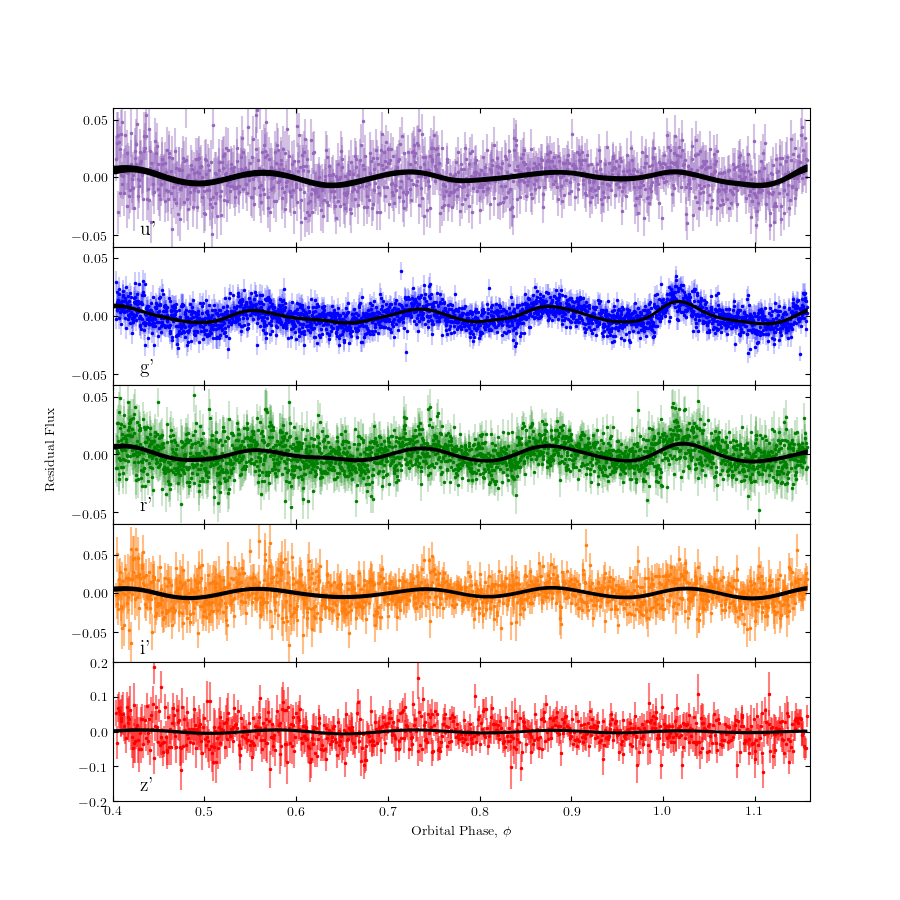

In [72]:
fig, ax = plt.subplots(5,figsize=(9,9),sharex=True)
ax = ax.ravel()
x_u,y_u,_ = binned_statistic(p_u,ny_u-nym_u,bins=150,statistic='mean')
x_g,y_g,_ = binned_statistic(p_g,ny_g-nym_g,bins=150,statistic='mean')
x_r,y_r,_ = binned_statistic(p_r,ny_r-nym_r,bins=150,statistic='mean')
x_i,y_i,_ = binned_statistic(p_i,ny_i-nym_i,bins=150,statistic='mean')
x_z,y_z,_ = binned_statistic(p_z,ny_z-nym_z,bins=150,statistic='mean')
# ax[0].scatter(p_u,ny_u-nym_u,marker='.', color='tab:purple')
# ax[1].scatter(p_g,ny_g-nym_g,marker='.', color='b')
# ax[2].scatter(p_r,ny_r-nym_r,marker='.', color='g')
# ax[3].scatter(p_i,ny_i-nym_i,marker='.', color='tab:orange')
# ax[4].scatter(p_z,ny_z-nym_z,marker='.', color='r')

markers0, caps0, bars0 = ax[0].errorbar(p_u,ny_u-nym_u, yerr=nyerr_u,marker='.', markersize=3,color='tab:purple', alpha=1, zorder=1,linestyle='none')
markers1, caps1, bars1 = ax[1].errorbar(p_g,ny_g-nym_g, yerr=nyerr_g,marker='.', markersize=3, color='b', alpha=1,linestyle='none', zorder=1)
markers2, caps2, bars2 = ax[2].errorbar(p_r,ny_r-nym_r, yerr=nyerr_r,marker='.', markersize=3, color='g', alpha=1, zorder=1,linestyle='none')
markers3, caps3, bars3 = ax[3].errorbar(p_i,ny_i-nym_i, yerr=nyerr_i,marker='.', markersize=3, color='tab:orange', alpha=1,linestyle='none', zorder=1)
markers4, caps4, bars4 = ax[4].errorbar(p_z,ny_z-nym_z, yerr=nyerr_z,marker='.', markersize=3, color='r', alpha=1, zorder=1,linestyle='none')

[bar.set_alpha(0.4) for bar in bars0]
[bar.set_alpha(0.2) for bar in bars1]
[bar.set_alpha(0.2) for bar in bars2]
[bar.set_alpha(0.5) for bar in bars3]
[bar.set_alpha(0.5) for bar in bars4]

# ax[0].scatter(binCentres(y_u),x_u,marker='.',zorder=2, color='k',s=40)
# ax[1].scatter(binCentres(y_g),x_g,marker='.',zorder=2, color='k',s=40)
# ax[2].scatter(binCentres(y_r),x_r,marker='.',zorder=2, color='k',s=40)
# ax[3].scatter(binCentres(y_i),x_i,marker='.',zorder=2, color='k',s=40)
# ax[4].scatter(binCentres(y_z),x_z,marker='.',zorder=2, color='k',s=40)
# ax[0].plot(p_u,nmu_u,zorder=3, color='k')
# # ax[1].plot(p_g,nmu_g,zorder=4, color='w')
# ax[2].plot(p_r,nmu_r,zorder=3, color='k')
# ax[3].plot(p_i,nmu_i,zorder=3, color='k')
# ax[4].plot(p_z,nmu_z,zorder=3, color='k')

ax[0].fill_between(p_u,nmu_u-nstd_u,nmu_u+nstd_u,zorder=3, color='k')
ax[1].fill_between(p_g,nmu_g-nstd_g,nmu_g+nstd_g,zorder=3, color='k')
ax[2].fill_between(p_r,nmu_r-nstd_r,nmu_r+nstd_r,zorder=3, color='k')
ax[3].fill_between(p_i,nmu_i-nstd_i,nmu_i+nstd_i,zorder=3, color='k')
ax[4].fill_between(p_z,nmu_z-nstd_z,nmu_z+nstd_z,zorder=3, color='k')

ax[0].set_ylim([-0.06,0.06])
ax[1].set_ylim([-0.06,0.06])
ax[2].set_ylim([-0.06,0.06])
ax[3].set_ylim([-0.09,0.09])
ax[4].set_ylim([-0.2,0.2])

ax[0].annotate("u'",xy=(0.43,-0.05),xytext=(0.43,-0.05),fontsize=14)
ax[1].annotate("g'",xy=(0.43,-0.05),xytext=(0.43,-0.05),fontsize=14)
ax[2].annotate("r'",xy=(0.43,-0.05),xytext=(0.43,-0.05),fontsize=14)
ax[3].annotate("i'",xy=(0.43,-0.08),xytext=(0.43,-0.08),fontsize=14)
ax[4].annotate("z'",xy=(0.43,-0.17),xytext=(0.43,-0.17),fontsize=14)

ax[0].tick_params(direction='in',top=True,bottom=True,right=True,left=True)
ax[1].tick_params(direction='in',top=True,bottom=True,right=True,left=True)
ax[2].tick_params(direction='in',top=True,bottom=True,right=True,left=True)
ax[3].tick_params(direction='in',top=True,bottom=True,right=True,left=True)
ax[4].tick_params(direction='in',top=True,bottom=True,right=True,left=True)

plt.xlim(0.40,1.16)
plt.subplots_adjust(hspace=0)
# plt.ylabel('Residual Flux')
fig.text(0.05, 0.5, 'Residual Flux', va='center', rotation='vertical')
plt.xlabel('Orbital Phase, $\phi$')
fig.savefig(fpath + 'pulsations_hcamcolours.pdf', bbox_inches="tight")
plt.show()